In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

In [2]:
# 正态分布
X = np.random.randn(300, 2)

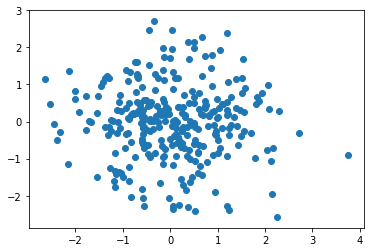

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
# 将一三象限和二四象限点分开

# 异或运算
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)

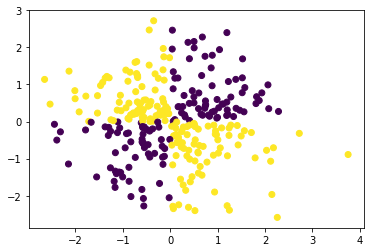

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
svc = SVC(kernel='rbf')

svc.fit(X, y)

H:\env\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

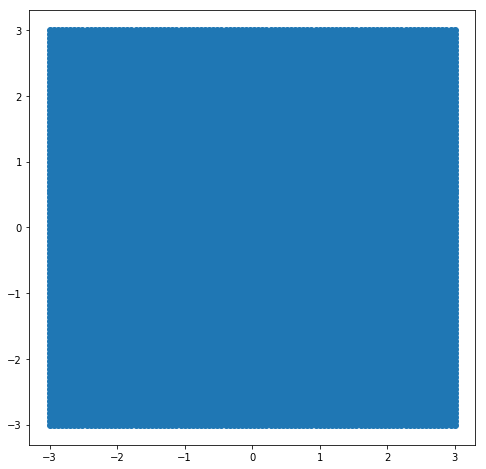

In [13]:
# 从背景中提出来一些点
x1 = np.linspace(-3, 3, 100)
y1 = np.linspace(-3, 3, 100)

X1, Y1 = np.meshgrid(x1, y1)

plt.figure(figsize=(8, 8))
plt.scatter(X1, Y1)

In [14]:
display(X1.shape, Y1.shape)

(100, 100)

(100, 100)

In [15]:
X1.reshape(-1, 1)

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       ...,
       [ 2.87878788],
       [ 2.93939394],
       [ 3.        ]])

In [25]:
# 制造出测试数据

X_test = np.concatenate([X1.reshape(-1, 1), Y1.reshape(-1, 1)], axis=1)
X_test.shape

(10000, 2)

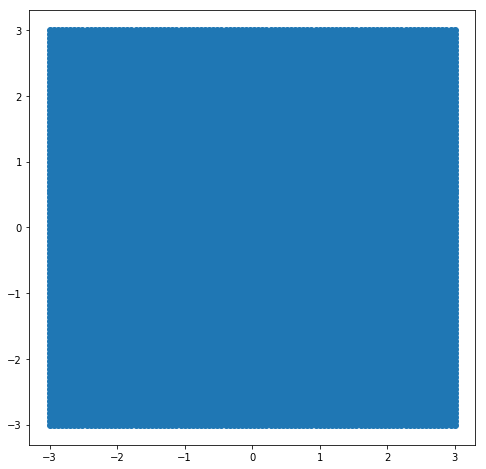

In [26]:
plt.figure(figsize=[8, 8])
plt.scatter(X_test[:, 0], X_test[:, 1])

In [19]:
y_ = svc.predict(X_test)
y_.shape

(10000,)

In [20]:
y_

array([ True,  True,  True, ...,  True,  True,  True])

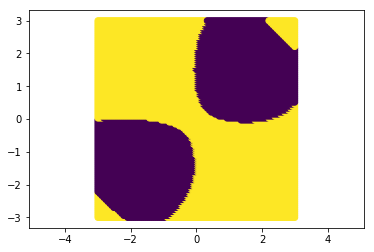

In [27]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_)
_ = plt.axis('equal')

In [28]:
# svm支持分离超平面hyperplane
# X_test 每个点距离分离超平面的距离
d_ = svc.decision_function(X_test)
d_

array([0.21300353, 0.20384123, 0.19385293, ..., 0.20289544, 0.21285247,
       0.2218734 ])

In [29]:
d_.min()

-3.3624484859819157

In [30]:
d_.max()

2.955154122692215

In [32]:
display(X1.shape, Y1.shape)

(100, 100)

(100, 100)

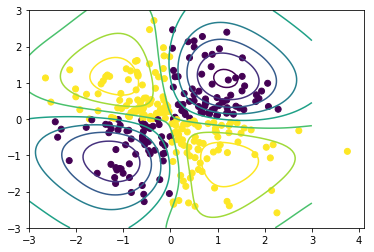

In [38]:
# 绘制等高线

plt.scatter(X[:, 0], X[:, 1], c=y)

plt.contour(X1, Y1, d_.reshape(100, 100))

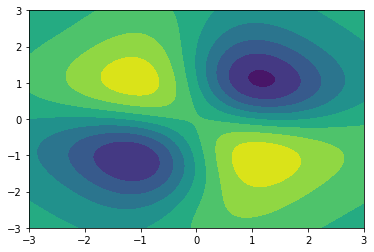

In [37]:
# 绘制等高面
plt.contourf(X1, Y1, d_.reshape(100, 100))

[-3, 3, -3, 3]

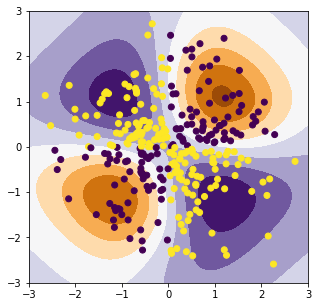

In [43]:
plt.figure(figsize=(5, 5))

plt.contourf(X1, Y1, d_.reshape(100, 100), cmap=plt.cm.PuOr)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.axis([-3, 3, -3, 3])